In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import pyplot
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df_2020 = pd.read_csv("C:/Users/Toomas/Desktop/ITMI_Data/Cleaned_datasets_25_64/Yearly/2020_cleaned_weights.csv")

In [3]:
# drop irrelevant columns for analysis
df_2020 = df_2020.drop(columns=['survey_year', 'respondent_id', 'age','bmi','bmi_four_groups','bmi_two_groups_split30', 'weights'])

In [4]:
# create dummy variables
# first change values from numeric to nominal for readable dummy labels

df_2020['gender'] = df_2020['gender'].replace([1,2],['MALE','FEMALE'])
df_2020['age_group'] = df_2020['age_group'].replace([1,2,3,4],['25_34','35_44','45_54','55_64'])
df_2020['ethnicity_estonian_nonestonian'] = df_2020['ethnicity_estonian_nonestonian'].replace([1,2],['ESTONIAN','NON_ESTONIAN'])
df_2020['education'] = df_2020['education'].replace([1,2,3,4],['PRIMARY_BASIC','SECONARY','SECONDARY_VOCATIONAL','HIGHER'])
df_2020['income_per_household_member'] = df_2020['income_per_household_member'].replace([1,2,3,4],['QUARTILE_1','QUARTILE_2','QUARTILE_3','QUARTILE_4'])
df_2020['chronic_disease'] = df_2020['chronic_disease'].replace([1,2],['YES','NO'])
df_2020['smoking_history'] = df_2020['smoking_history'].replace([1,2,3,4],['NEVER','FORMERLY','SELDOM','DAILY'])
df_2020['alcohol_standard_units_consumption_frequency'] = df_2020['alcohol_standard_units_consumption_frequency'].replace([1,2,3,4,5],['NEVER','<1x_MONTH','1+x_MONTH','1x_WEEK','ALMOST_DAILY'])
df_2020['exercising_frequency'] = df_2020['exercising_frequency'].replace([1,2,3,4,5,6],['NEVER','1x_MONTH','2_3x_MONTH','1x_WEEK','2_3x_WEEK', '4_7X_WEEK'])
df_2020['work_physical_effort_level'] = df_2020['work_physical_effort_level'].replace([1,2,3,4],['LITTLE','SOME','AVERAGE','A_LOT'])


df_dummies = pd.get_dummies(df_2020, columns=['gender', 'age_group', \
                                              'ethnicity_estonian_nonestonian', 'education',\
                                              'income_per_household_member', 'chronic_disease',\
                                              'smoking_history',\
                                              'alcohol_standard_units_consumption_frequency',\
                                              'exercising_frequency',\
                                              'work_physical_effort_level'],drop_first=False)

In [5]:
df_dummies.columns

Index(['bmi_two_groups_split25', 'gender_FEMALE', 'gender_MALE',
       'age_group_25_34', 'age_group_35_44', 'age_group_45_54',
       'age_group_55_64', 'ethnicity_estonian_nonestonian_ESTONIAN',
       'ethnicity_estonian_nonestonian_NON_ESTONIAN', 'education_HIGHER',
       'education_PRIMARY_BASIC', 'education_SECONARY',
       'education_SECONDARY_VOCATIONAL',
       'income_per_household_member_QUARTILE_1',
       'income_per_household_member_QUARTILE_2',
       'income_per_household_member_QUARTILE_3',
       'income_per_household_member_QUARTILE_4', 'chronic_disease_NO',
       'chronic_disease_YES', 'smoking_history_DAILY',
       'smoking_history_FORMERLY', 'smoking_history_NEVER',
       'smoking_history_SELDOM',
       'alcohol_standard_units_consumption_frequency_1+x_MONTH',
       'alcohol_standard_units_consumption_frequency_1x_WEEK',
       'alcohol_standard_units_consumption_frequency_<1x_MONTH',
       'alcohol_standard_units_consumption_frequency_ALMOST_DAILY',
    

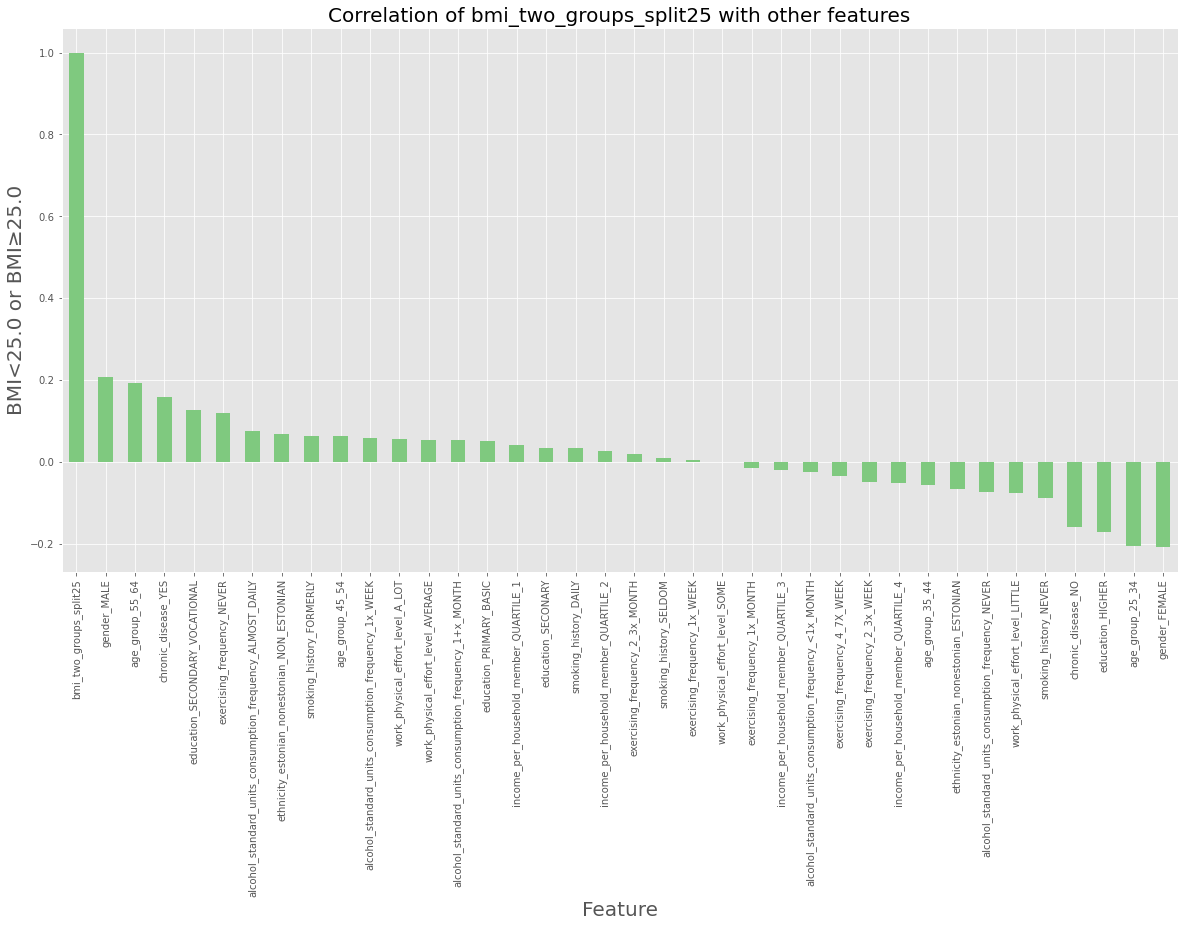

<Figure size 432x288 with 0 Axes>

In [6]:
## correlation graph
plt.style.use('ggplot')
plt.figure(figsize = (20,10))

# get a color map

my_cmap = cm.get_cmap('Accent')

# Get correlation of bmi_two_groups_split25 with other variables

df_dummies.corr()['bmi_two_groups_split25'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x and 

plt.title('Correlation of bmi_two_groups_split25 with other features', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('BMI<25.0 or BMI≥25.0', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/correlations.pdf")

In [7]:
# scaling all variables to the range of 0 to 1 before data learning process

y = df_dummies['bmi_two_groups_split25'].values
X = df_dummies.drop(columns = ['bmi_two_groups_split25'])

features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [8]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [9]:
#====================================
# Logistic regression model training
#====================================

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [10]:
#print out the hyperparameters of the trained model
model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
# Logistic regression model prediction and metrics
y_pred = model_LR.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.63
Precision: 	 0.61
Recall: 	 0.55
F1-score: 	 0.58


In [16]:
# LR model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1 = LogisticRegression()
scores1 = cross_val_score(model_LR_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_LR_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.66
Precision: 0.64
Recall: 0.57
F1 Score: 0.60
AUC Score: 0.71


Feature: 0, Score: -0.41181
Feature: 1, Score: 0.41172
Feature: 2, Score: -0.77011
Feature: 3, Score: -0.19305
Feature: 4, Score: 0.16716
Feature: 5, Score: 0.79591
Feature: 6, Score: -0.13397
Feature: 7, Score: 0.13388
Feature: 8, Score: -0.40018
Feature: 9, Score: 0.19983
Feature: 10, Score: -0.04883
Feature: 11, Score: 0.24908
Feature: 12, Score: -0.12538
Feature: 13, Score: 0.06016
Feature: 14, Score: 0.04205
Feature: 15, Score: 0.02307
Feature: 16, Score: -0.19121
Feature: 17, Score: 0.19111
Feature: 18, Score: -0.26898
Feature: 19, Score: 0.17599
Feature: 20, Score: 0.02479
Feature: 21, Score: 0.06811
Feature: 22, Score: 0.15714
Feature: 23, Score: -0.13319
Feature: 24, Score: 0.00032
Feature: 25, Score: 0.26167
Feature: 26, Score: -0.28602
Feature: 27, Score: -0.09173
Feature: 28, Score: 0.01613
Feature: 29, Score: 0.18825
Feature: 30, Score: -0.14468
Feature: 31, Score: -0.20232
Feature: 32, Score: 0.23425
Feature: 33, Score: 0.00357
Feature: 34, Score: -0.27113
Feature: 35, Sc

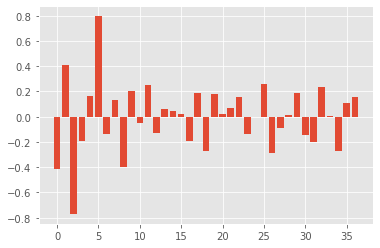

In [17]:
# get importance of features in LR model
importance = model_LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


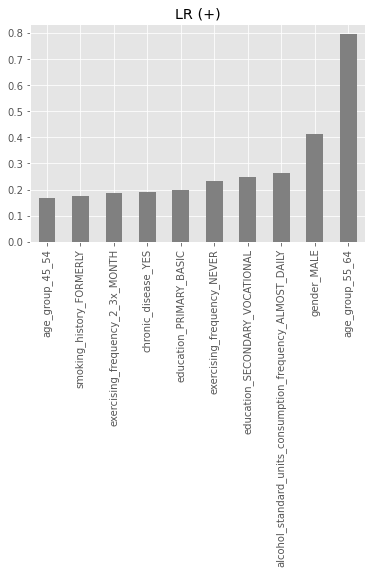

In [18]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in LR model 

weights = pd.Series(model_LR.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('LR (+)')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI25.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


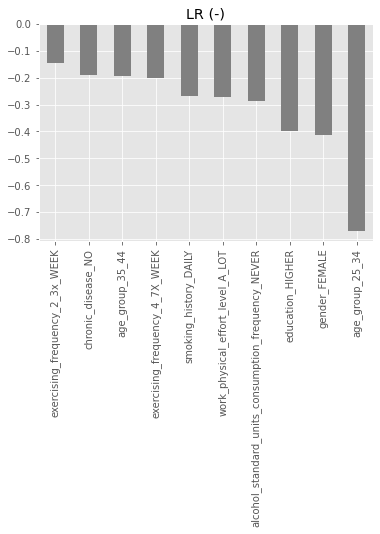

In [19]:
# the most negative impact / LR model
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar', color='grey'))
plt.title('LR (-)')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI25.pdf", bbox_inches='tight')

In [20]:
# roc curve for LR model

pred_prob1 = model_LR.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [21]:
# computing auc score for LR
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)


0.6831467764971602


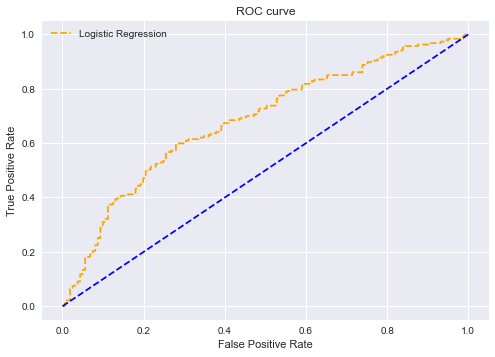

In [22]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI25.pdf")
plt.show();

In [28]:
#====================================
# Random Forest model training
#====================================

model_RF = RandomForestClassifier()

model_RF.fit(X_train, y_train)


RandomForestClassifier()

In [29]:
#print out the hyperparameters of the trained model
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# Random forest model prediction and metrics

y_pred = model_RF.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.61
Precision: 	 0.58
Recall: 	 0.53
F1-score: 	 0.55


In [27]:
# RF model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1 = RandomForestClassifier()
scores1 = cross_val_score(model_RF_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_RF_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.62
Precision: 0.61
Recall: 0.53
F1 Score: 0.55
AUC Score: 0.65


Feature: 0, Score: 0.02687
Feature: 1, Score: 0.03121
Feature: 2, Score: 0.03916
Feature: 3, Score: 0.02723
Feature: 4, Score: 0.02583
Feature: 5, Score: 0.03894
Feature: 6, Score: 0.02422
Feature: 7, Score: 0.02615
Feature: 8, Score: 0.03161
Feature: 9, Score: 0.02080
Feature: 10, Score: 0.02461
Feature: 11, Score: 0.02791
Feature: 12, Score: 0.03034
Feature: 13, Score: 0.03625
Feature: 14, Score: 0.03195
Feature: 15, Score: 0.02842
Feature: 16, Score: 0.02501
Feature: 17, Score: 0.02555
Feature: 18, Score: 0.02383
Feature: 19, Score: 0.03243
Feature: 20, Score: 0.03211
Feature: 21, Score: 0.01626
Feature: 22, Score: 0.01819
Feature: 23, Score: 0.01254
Feature: 24, Score: 0.02816
Feature: 25, Score: 0.01313
Feature: 26, Score: 0.02952
Feature: 27, Score: 0.03397
Feature: 28, Score: 0.02797
Feature: 29, Score: 0.01983
Feature: 30, Score: 0.03481
Feature: 31, Score: 0.03143
Feature: 32, Score: 0.01673
Feature: 33, Score: 0.02860
Feature: 34, Score: 0.01587
Feature: 35, Score: 0.03394
Fe

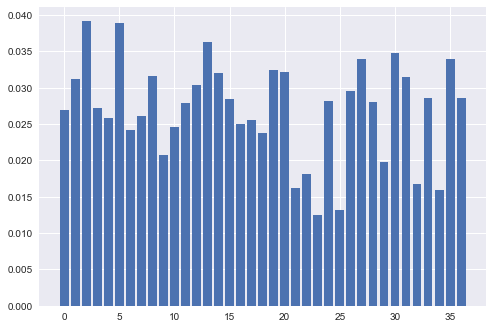

In [31]:
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


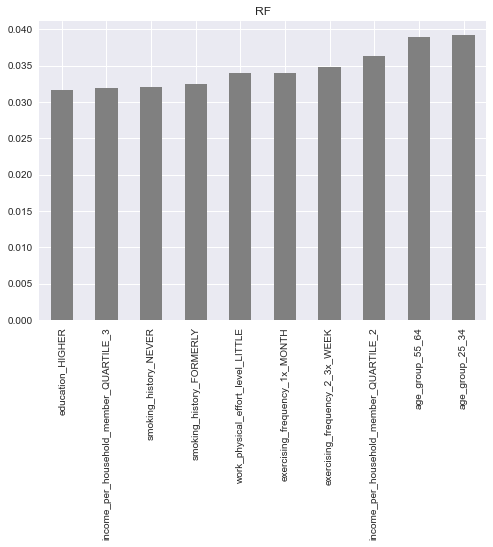

In [32]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in RF model 

weights = pd.Series(model_RF.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('RF')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI25.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


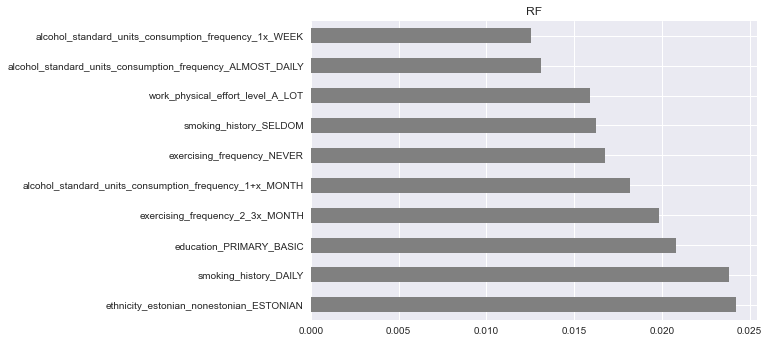

In [33]:
# the least impact / RF model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('RF')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI25.pdf",bbox_inches='tight')

In [34]:
# roc curve for RF model

pred_prob2 = model_RF.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [35]:
# computing auc score for RF
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6391038628890291


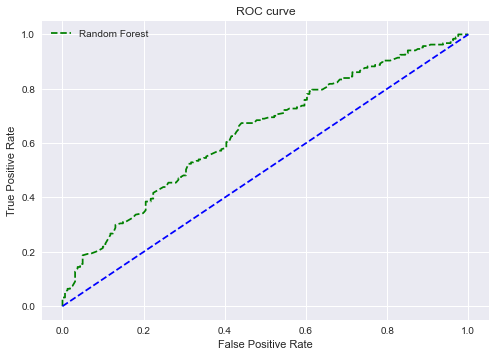

In [36]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI25.pdf")
plt.show();

In [37]:
#====================================
# SVM model training
#====================================

model_SVM=SVC(probability = True, kernel ='linear')
model_SVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [38]:
#print out the hyperparameters of the trained model
model_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
# SVM model prediction and metrics

y_pred = model_SVM.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))


SVM model metrics:
Accuracy: 0.63
Precision: 	 0.60
Recall: 	 0.57
F1-score: 	 0.58


In [40]:
# SVM model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1 = SVC(probability = True, kernel ='linear')
scores1 = cross_val_score(model_SVM_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_SVM_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.65
Precision: 0.63
Recall: 0.55
F1 Score: 0.59
AUC Score: 0.70


AxesSubplot(0.125,0.125;0.775x0.755)


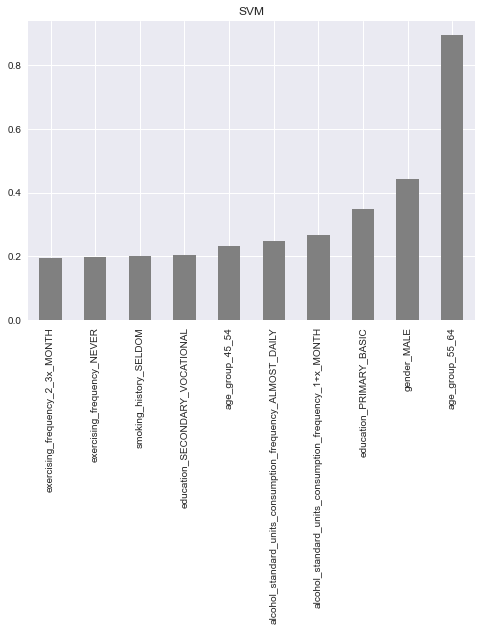

In [41]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in SVM model 

weights = pd.Series(model_SVM.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('SVM')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI25.pdf",bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


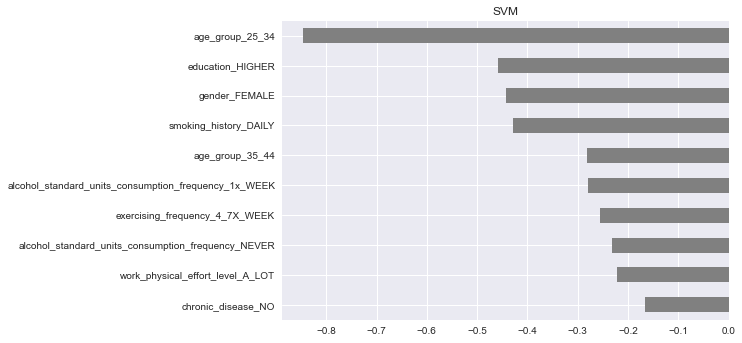

In [42]:
# the most negative impact / SVM model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('SVM')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI25.pdf",bbox_inches='tight')

In [43]:
# roc curve for SVM model

pred_prob3 = model_SVM.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [44]:
# computing auc score for SVM
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.6753246753246753


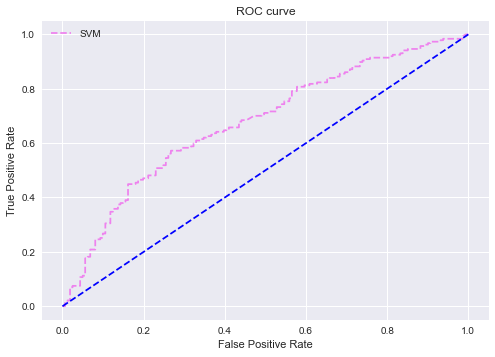

In [45]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI25.pdf")
plt.show();

In [46]:
#====================================
# Decision Tree model training
#====================================

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
#print out the hyperparameters of the trained model
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
y_pred = model_DT.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.56
Precision: 	 0.53
Recall: 	 0.52
F1-score: 	 0.52


In [49]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1 = DecisionTreeClassifier()
scores1 = cross_val_score(model_DT_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_DT_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.57
Precision: 0.52
Recall: 0.55
F1 Score: 0.54
AUC Score: 0.56


Feature: 0, Score: 0.01052
Feature: 1, Score: 0.03446
Feature: 2, Score: 0.04852
Feature: 3, Score: 0.03541
Feature: 4, Score: 0.01466
Feature: 5, Score: 0.01515
Feature: 6, Score: 0.02194
Feature: 7, Score: 0.02996
Feature: 8, Score: 0.02779
Feature: 9, Score: 0.01465
Feature: 10, Score: 0.01996
Feature: 11, Score: 0.02188
Feature: 12, Score: 0.03436
Feature: 13, Score: 0.03364
Feature: 14, Score: 0.03670
Feature: 15, Score: 0.02878
Feature: 16, Score: 0.02408
Feature: 17, Score: 0.02453
Feature: 18, Score: 0.03481
Feature: 19, Score: 0.03371
Feature: 20, Score: 0.02330
Feature: 21, Score: 0.02279
Feature: 22, Score: 0.02265
Feature: 23, Score: 0.01151
Feature: 24, Score: 0.03450
Feature: 25, Score: 0.01436
Feature: 26, Score: 0.04752
Feature: 27, Score: 0.02327
Feature: 28, Score: 0.02371
Feature: 29, Score: 0.02486
Feature: 30, Score: 0.02865
Feature: 31, Score: 0.04610
Feature: 32, Score: 0.01566
Feature: 33, Score: 0.03702
Feature: 34, Score: 0.01430
Feature: 35, Score: 0.03276
Fe

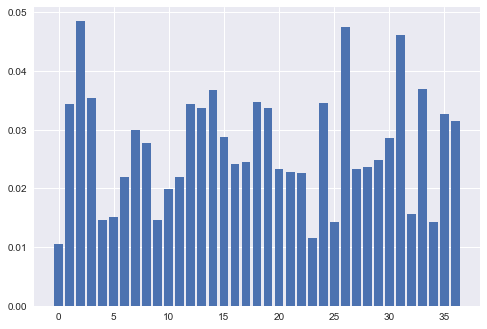

In [50]:
# plot feature important of DT/CART model
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


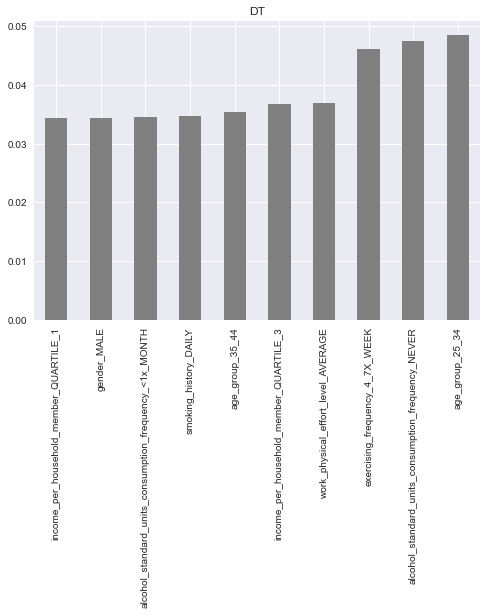

In [51]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in DT model 

weights = pd.Series(model_DT.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('DT')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI25.pdf",bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


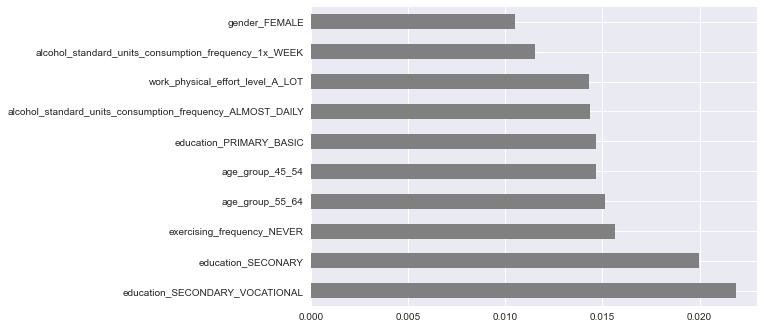

In [52]:
# the most negative impact / SVM model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI25.pdf",bbox_inches='tight')

In [53]:
# roc curve for DT model

pred_prob4 = model_DT.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [54]:
# computing auc score for DT
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5609160660311556


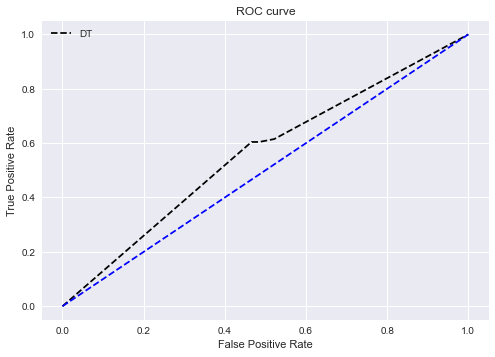

In [55]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI25.pdf")
plt.show();

In [56]:
#====================================
# Gaussian Naive Bayes model training
#====================================

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [57]:
#print out the hyperparameters of the trained model
model_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [58]:
y_pred = model_NB.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.66
Precision: 	 0.62
Recall: 	 0.69
F1-score: 	 0.65


In [59]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1 = GaussianNB()
scores1 = cross_val_score(model_NB_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_NB_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.63
Precision: 0.57
Recall: 0.69
F1 Score: 0.63
AUC Score: 0.69


In [60]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(model_NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. exercising_frequency_NEVER (0.025287)
2. chronic_disease_NO (0.018966)
3. chronic_disease_YES (0.018966)
4. education_HIGHER (0.018966)
5. alcohol_standard_units_consumption_frequency_1x_WEEK (0.015517)
6. age_group_55_64 (0.013793)
7. education_SECONARY (0.009195)
8. exercising_frequency_2_3x_WEEK (0.008621)
9. age_group_25_34 (0.008046)
10. education_PRIMARY_BASIC (0.006897)
11. alcohol_standard_units_consumption_frequency_ALMOST_DAILY (0.006897)
12. income_per_household_member_QUARTILE_4 (0.006322)
13. gender_FEMALE (0.006322)
14. age_group_35_44 (0.006322)
15. gender_MALE (0.006322)
16. work_physical_effort_level_AVERAGE (0.005747)
17. age_group_45_54 (0.004598)
18. alcohol_standard_units_consumption_frequency_NEVER (0.004023)
19. income_per_household_member_QUARTILE_3 (0.003448)
20. exercising_frequency_2_3x_MONTH (0.002299)
21. smoking_history_NEVER (0.001724)
22. smoking_history_SELDOM (0.001724)
23. work_physical_effort_level_LITTLE (0.001724)
24. work_physi

AxesSubplot(0.125,0.125;0.775x0.755)


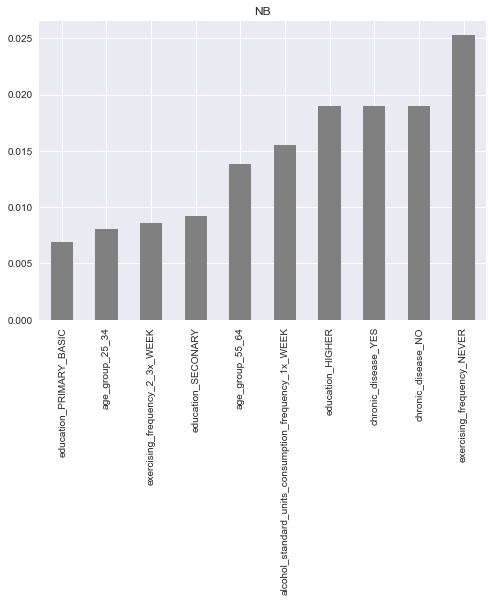

In [61]:
# greatest impact / NB model

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('NB')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI25.pdf",bbox_inches='tight')


AxesSubplot(0.125,0.125;0.775x0.755)


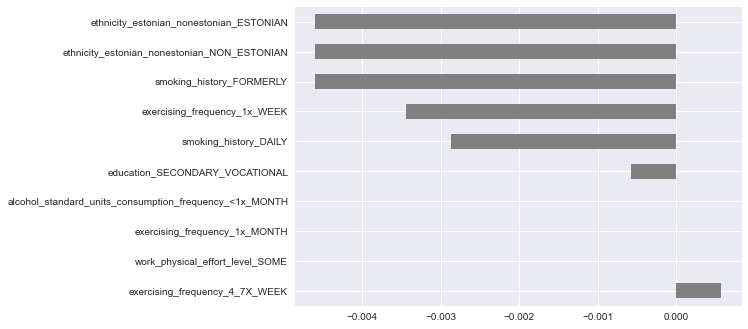

In [62]:
# smalles impact / NB model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI25.pdf",bbox_inches='tight')

In [63]:
# roc curve for NB model

pred_prob5 = model_NB.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [64]:
# computing auc score for NB
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7056000265718936


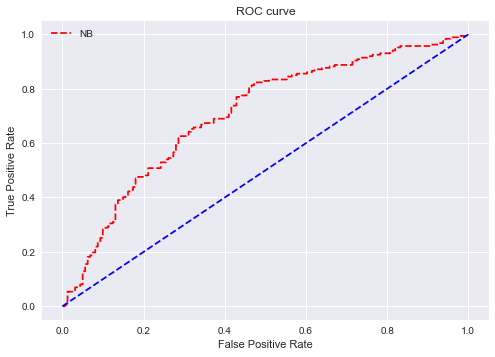

In [65]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI25.pdf")
plt.show();

In [66]:
#====================================
# KNN model training
#====================================

# testing accuracy for k from 1 to 25
k_range = range(1,26)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

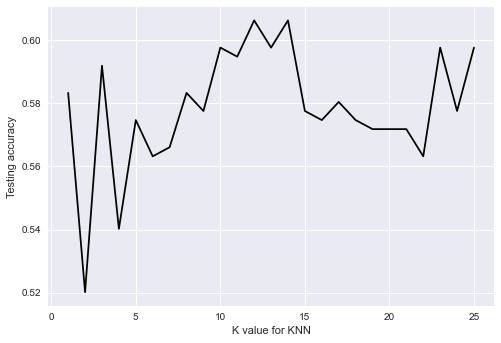

In [67]:
#plotting the relationship between k values and correspondgin testing accuracy

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [68]:
# the final model should have k=12
model_KNN = KNeighborsClassifier(n_neighbors=12)
model_KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=12)

In [69]:
#print out the hyperparameters of the trained model
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 12,
 'p': 2,
 'weights': 'uniform'}

In [70]:
y_pred = model_KNN.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.61
Precision: 	 0.57
Recall: 	 0.65
F1-score: 	 0.60


In [71]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1 = KNeighborsClassifier()
scores1 = cross_val_score(model_KNN_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_KNN_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.59
Precision: 0.55
Recall: 0.54
F1 Score: 0.54
AUC Score: 0.62


In [72]:
# feature importance is not defined for the KNN classification algorithm and there is no easy way to calucate it

In [73]:
# roc curve for KNN model

pred_prob6 = model_KNN.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [74]:
# computing auc score for KNN
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6293885142990002


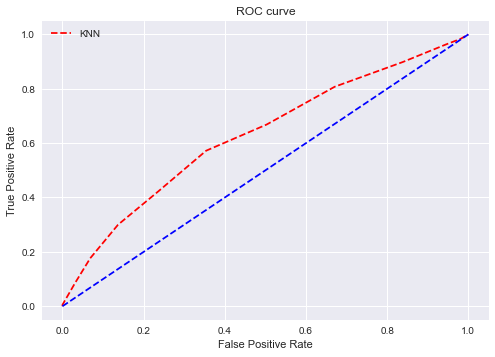

In [75]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI25.pdf")
plt.show();

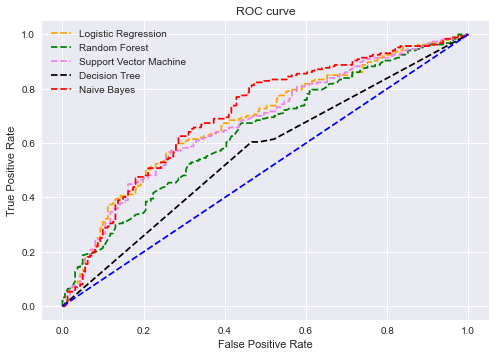

In [76]:
# a plot of roc curves of all 5 models
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all5_BMI25.pdf")
plt.show();

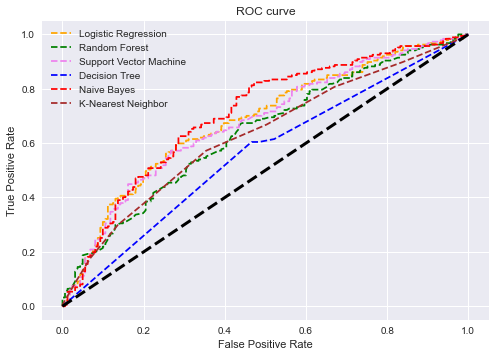

In [77]:
# a plot of roc curves of all 6 models
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='--',color='brown', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BMI25.pdf")
plt.show();

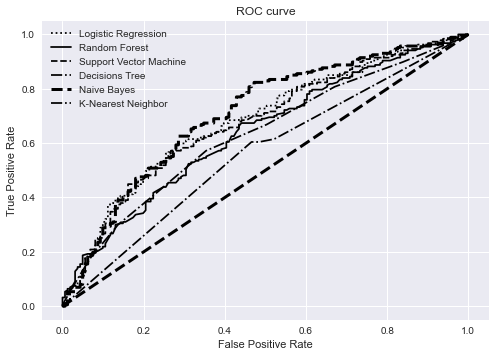

In [78]:
# a plot of roc curves of all 6 models / black and white
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle=':',color = 'black',label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='-',color='black', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='-.',color='black', label='Decisions Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='black', linewidth=3, label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='-.',color='black', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BW_BMI25.pdf")
plt.show();